In [20]:
# Import necessary libraries and enable GPU if available
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [21]:
# Check if GPU is available and enable it
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and configured.")
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [22]:
# Define data directories
train_dir = r'D:\Open_CV_Practice\TCS\Train'
test_dir = r'D:\Open_CV_Practice\TCS\Test'


In [23]:
# Define hyperparameters
batch_size = 32
epochs = 110  # Increase the number of epochs 


In [24]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2595 images belonging to 11 classes.
Found 283 images belonging to 11 classes.


In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(11, activation='softmax')
])


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 256)     

In [28]:
# Define precision and recall metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall])


In [49]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/110
82/82 [==============================] - 281s 3s/step - loss: 2.3534 - accuracy: 0.1503 - precision_1: 0.3103 - recall_1: 0.0035 - val_loss: 2.1662 - val_accuracy: 0.3004 - val_precision_1: 0.1111 - val_recall_1: 0.0035
Epoch 2/110
82/82 [==============================] - 259s 3s/step - loss: 2.1144 - accuracy: 0.2802 - precision_1: 0.4889 - recall_1: 0.0339 - val_loss: 1.9710 - val_accuracy: 0.2544 - val_precision_1: 0.3731 - val_recall_1: 0.0883
Epoch 3/110
82/82 [==============================] - 259s 3s/step - loss: 1.8184 - accuracy: 0.3846 - precision_1: 0.6232 - recall_1: 0.1179 - val_loss: 1.4519 - val_accuracy: 0.5477 - val_precision_1: 0.7143 - val_recall_1: 0.2297
Epoch 4/110
82/82 [==============================] - 251s 3s/step - loss: 1.6282 - accuracy: 0.4543 - precision_1: 0.6795 - recall_1: 0.2116 - val_loss: 1.2104 - val_accuracy: 0.6855 - val_precision_1: 0.8860 - val_recall_1: 0.3569
Epoch 5/110
82/82 [==============================] - 238s 3s/step - loss

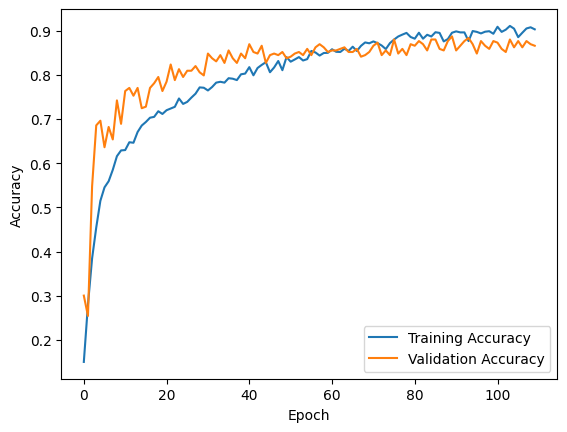

In [51]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

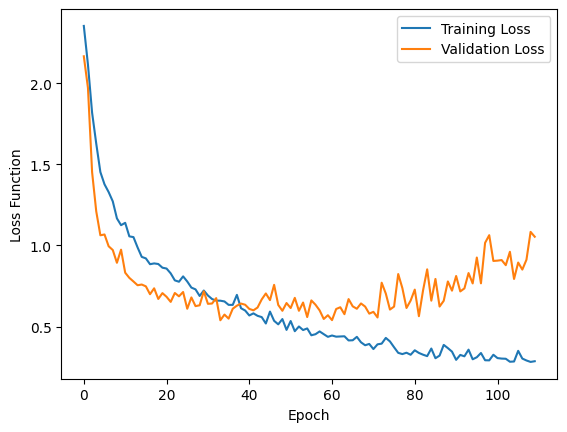

In [52]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.legend()
plt.show()

In [ ]:
test_results = model.evaluate(test_generator, steps=len(test_generator))
test_accuracy = test_results[1] * 100
test_loss = test_results[0]

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


9/9 [==============================] - 6s 606ms/step - loss: 0.8073 - accuracy: 0.8622 - precision: 0.8696 - recall: 0.8481
Test Accuracy: 86.22%
Test Loss: 0.8073


7/9 [======================>.......] - ETA: 2s

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 13s 1s/step


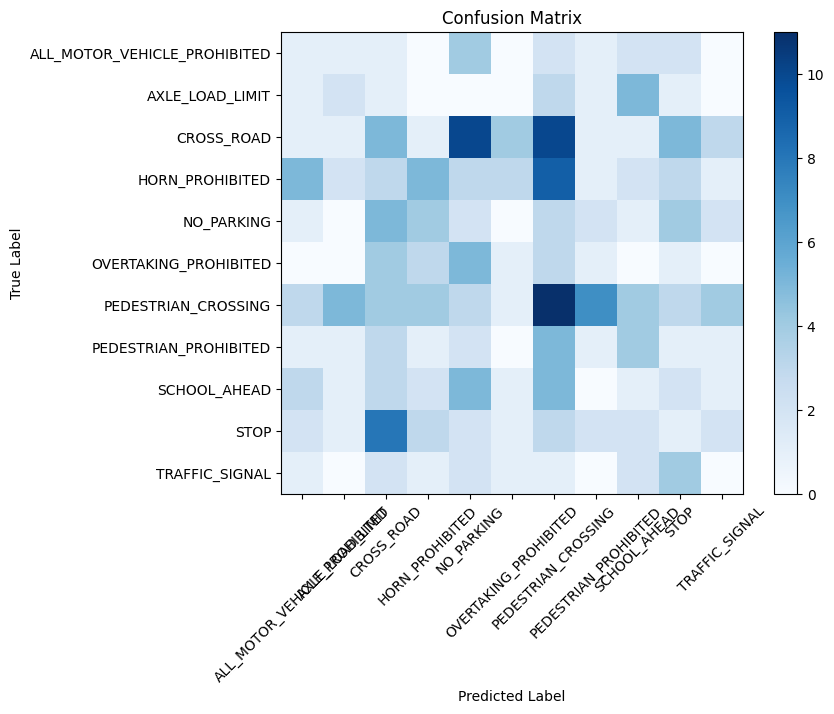

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have a test_generator that generates test data and labels
# Make sure to set shuffle=False in test_generator

# Generate predictions on the test set
y_pred = model.predict(test_generator)

# Get true labels from the generator
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = len(test_generator.class_indices)
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the unseen image
unseen_image_path = r'D:\Open_CV_Practice\download (1).jpeg'
unseen_img = image.load_img(unseen_image_path, target_size=(224, 224))
unseen_img = image.img_to_array(unseen_img)
unseen_img = np.expand_dims(unseen_img, axis=0)
unseen_img = unseen_img / 255.0  # Rescale to [0, 1]

# Predict the class of the unseen image
predictions = model.predict(unseen_img)
predicted_class = np.argmax(predictions)

# Get class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Print the predicted class
print(f"Predicted Class: {class_labels[predicted_class]}")


NameError: name 'model' is not defined